In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [30]:
train_images.shape

(60000, 28, 28)

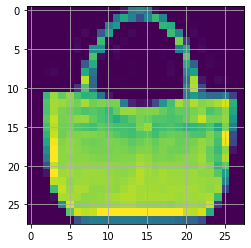

In [31]:
plt.figure()
plt.imshow(train_images[100])
plt.grid(True)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

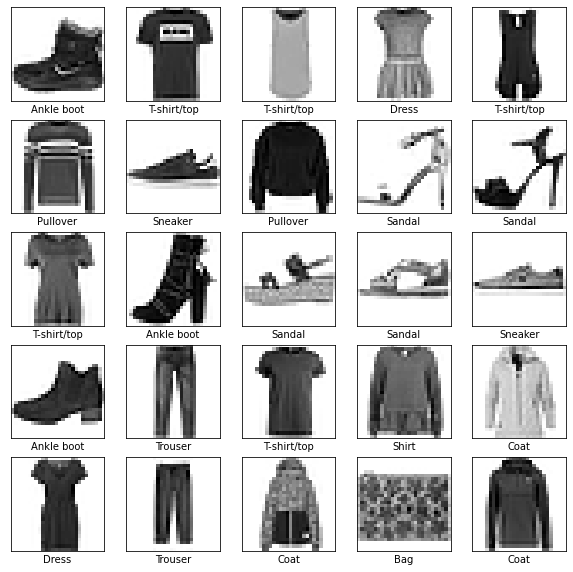

In [34]:


plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [0]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2807 - accuracy: 0.8956
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9019
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2579 - accuracy: 0.9042
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9077
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2402 - accuracy: 0.9107


In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy',test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3518 - accuracy: 0.8753
Accuracy 0.8752999901771545


In [0]:
predictions = model.predict(test_images)

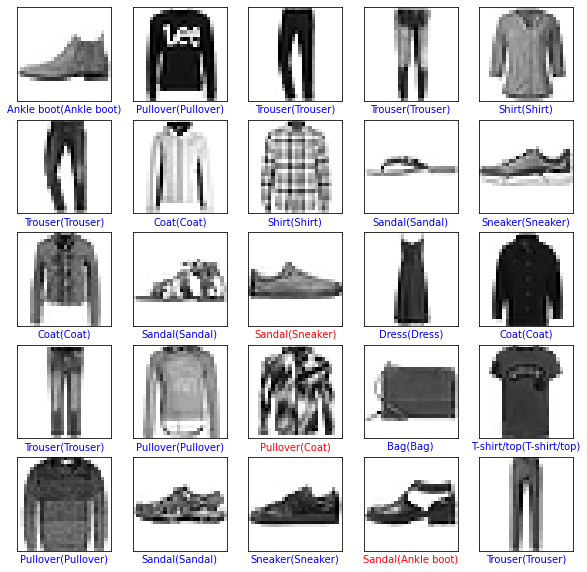

In [46]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5,5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel('{}({})'.format(class_names[predicted_label], class_names[true_label]),
             color = color)